<a href="https://colab.research.google.com/github/gsb3501/2023bigdatamarketing/blob/main/20230824_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 20230824 머신러닝 파트

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [47]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ashopping.csv')

In [48]:
df.head(10)

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
0,1,1,4963160,1,22,225598,1,5445,1,3,...,7,6,1,6,3303,0,3,2,1,149.136364
1,2,1,2271520,0,38,59777,22,350995,1,1,...,5,4,0,2,3129,0,5,3,4,81.342105
2,3,1,2484250,0,2,1242125,6,186045,1,2,...,4,6,0,3,3636,0,4,1,4,1817.000000
3,4,1,2778850,0,9,308761,1,5195,2,4,...,4,5,0,4,3637,0,7,4,6,403.111111
4,5,1,4437610,1,10,443761,9,246350,2,4,...,6,6,0,4,3638,0,5,1,4,362.800000
5,6,1,10720400,2,4,2680100,20,348145,2,4,...,9,5,0,3,3639,1,7,4,1,908.750000
6,7,1,7228460,1,11,657133,30,380945,2,1,...,3,6,1,4,3244,0,4,1,2,293.909091
7,8,1,8790450,2,34,258543,4,354735,2,2,...,7,6,0,3,1940,0,6,3,6,56.058824
8,9,1,9759800,2,6,1626633,17,364895,2,4,...,9,6,0,4,1940,1,7,4,6,322.333333
9,10,1,4077660,0,95,42923,27,357645,1,4,...,9,5,0,2,3643,0,7,7,6,37.347368


In [49]:
df.columns

Index(['고객ID', '이탈여부', '총매출액', '구매금액대', '방문빈도', '1회 평균매출액', '할인권 사용 횟수',
       '총 할인 금액', '고객등급', '구매유형', '클레임접수여부', '구매카테고리수', '거주지역', '성별', '고객 나이대',
       '거래기간', '할인민감여부', 'Recency', 'Frequency', 'Monetary', '평균 구매주기'],
      dtype='object')

# 분류모형 (Classifier)

### 로지스틱 회귀분석

In [50]:
X = df[['총매출액', '거래기간', '방문빈도']]
Y = df['이탈여부']

print(X.head())
print('---------------------------')
print(Y.head())

      총매출액  거래기간  방문빈도
0  4963160  3303    22
1  2271520  3129    38
2  2484250  3636     2
3  2778850  3637     9
4  4437610  3638    10
---------------------------
0    1
1    1
2    1
3    1
4    1
Name: 이탈여부, dtype: int64


In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
#train, test를 split 하는 과정. random_state 는 그냥 0으로 넣으면 됨. train:test = 7:3

print(X_train.head())
print('----------------------------------')
print(X_test.head())
print('----------------------------------')
print(Y_train.head())
print('----------------------------------')
print(Y_test.head())

        총매출액  거래기간  방문빈도
105  9605490  3739    24
68   4540390  3495    20
479  2911800  4113    42
399  9172750  4033    18
434  2525020  4068    16
----------------------------------
         총매출액  거래기간  방문빈도
993   9118590  2826    15
859  17322270  2969    24
298   8048480  3932     5
553   7545460  1631    71
672  11151760  2695    54
----------------------------------
105    1
68     1
479    0
399    0
434    0
Name: 이탈여부, dtype: int64
----------------------------------
993    0
859    0
298    1
553    0
672    0
Name: 이탈여부, dtype: int64


In [52]:
# X 변수들에 scale : 총매출액, 거래기간, 방문빈도의 숫자가 너무 달라서
scaler = StandardScaler()

In [53]:
# scaler에 X 변수들을 fitting할 수 있는 지 확인
scaler.fit(X)

StandardScaler()

In [54]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [55]:
X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,0,1,2
0,0.645015,0.251800,0.057098
1,-0.226789,-0.000923,-0.152627
2,-0.507102,0.639171,1.000858
3,0.570532,0.556311,-0.257489
4,-0.573674,0.592562,-0.362352


In [56]:
X_train_df.describe()

,0,1,2
count,700.000000,700.000000,700.000000
mean,-0.013047,0.026650,0.022418
std,0.949767,0.992977,0.998648
min,-0.683645,-2.585121,-1.148819
25%,-0.521200,-0.483583,-0.637615
50%,-0.296831,0.365733,-0.257489
75%,0.119929,0.736791,0.371685
max,10.626287,1.903823,5.352645


In [57]:
X_test_df = pd.DataFrame(X_test)
X_test_df.head()

,0,1,2
0,0.561210,-0.693840,-0.414783
1,1.973225,-0.545728,0.057098
2,0.377023,0.451700,-0.939095
3,0.290443,-1.931563,2.521362
4,0.911158,-0.829524,1.630032


In [58]:
X_test_df.describe()

,0,1,2
count,300.000000,300.000000,300.000000
mean,0.030442,-0.062184,-0.052309
std,1.111004,1.016792,1.004532
min,-0.683645,-2.764306,-1.096388
25%,-0.529459,-0.837292,-0.637615
50%,-0.325508,0.313428,-0.283705
75%,0.114624,0.737568,0.214391
max,9.624778,1.174654,6.925580


In [59]:
Y.describe()
# 이탈여부의 mean 이 0.3이라는 것은 이탈여부가 0인 경우가 더 많다는 뜻 --> Y가 불균형함 (7:3)
# 이탈여부가 0인게 700개 / 이탈여부가 1인게 300개
# 오버 샘플링은 이탈여부가 1인걸 700까지 늘려주는 것이고, 언더 샘플링은 이탈여부가 0인 것을 300까지 줄여주는 것

count    1000.000000
mean        0.300000
std         0.458487
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: 이탈여부, dtype: float64

In [60]:
Y_train_df = pd.DataFrame(Y_train)
Y_train_df.describe()

,이탈여부
count,700.000000
mean,0.312857
std,0.463988
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [61]:
from imblearn.over_sampling import SMOTE # imbalance learning
from collections import Counter

In [62]:
smote = SMOTE(random_state = 0)

In [63]:
X_train_over, Y_train_over = smote.fit_resample(X_train, Y_train)
# 현재 Y의 값이 불균형해서 oversampling 해줘야되는데, Y를 더 배정할 때 X도 함께 뽑히기 때문에(같은 인덱스의 행이 뽑힘) smote를 할 때, X_train과 Y_train 을 같이 넣는다.

In [64]:
X_train_df= pd.DataFrame(X_train_over)
X_train_df.describe()

,0,1,2
count,962.000000,962.000000,962.000000
mean,-0.063832,-0.070687,-0.058129
std,0.901982,1.012710,0.986468
min,-0.683645,-2.585121,-1.148819
25%,-0.538150,-0.507405,-0.729370
50%,-0.328750,0.275984,-0.345678
75%,0.051036,0.596964,0.266822
max,10.626287,1.903823,5.352645


In [65]:
Y_train_df= pd.DataFrame(Y_train_over)
Y_train_df.describe() # 이제 이탈여부의 mean 이 50:50비율로 맞춰짐

,이탈여부
count,962.00000
mean,0.50000
std,0.50026
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [66]:
Counter(Y_train_over)

Counter({1: 481, 0: 481})

In [67]:
# Y가 불균형하면 (이탈X 7:이탈O 3)이면, train 도 불균형하게 됨. 즉, 이탈여부 X가 더 많이 되도록 train 된다... -> 즉, 모델의 성능이 떨어짐
# 따라서 Y의 값을 50:50으로 반반 나눠야 제대로 train 된다.

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [69]:
lg_model = LogisticRegression(random_state = 0)

In [70]:
lg_model.fit(X_train_over, Y_train_over)

LogisticRegression(random_state=0)

In [71]:
Y_pred = lg_model.predict(X_test) #X_test를 가지고, 만든 모델의 예측값 y^을 만든다

In [72]:
print(Y_pred)

[1 1 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 1 1 0 1 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1
 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 1
 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 1 0 0 0
 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0
 0 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 1 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 1
 0 1 0 1]


In [73]:
# 변수의 베타값 확인
# 총매출액, 거래기간, 방문빈도 순서로
lg_model.coef_

array([[-0.10794002, -0.58901554, -0.48657009]])

In [74]:
cr = classification_report(Y_test, Y_pred)
print(cr)
# f1 score 확인!

              precision    recall  f1-score   support

           0       0.91      0.66      0.76       219
           1       0.47      0.81      0.59        81

    accuracy                           0.70       300
   macro avg       0.69      0.74      0.68       300
weighted avg       0.79      0.70      0.72       300



## K-NN 모형


In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
kn_model = KNeighborsClassifier()

In [77]:
kn_model.fit(X_train_over, Y_train_over)

KNeighborsClassifier()

In [80]:
Y_pred_kn = kn_model.predict(X_test)

In [81]:
print(Y_pred_kn)

[0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 1 0 1
 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 1
 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0
 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 0 0 0
 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1
 1 0 0 1]


In [82]:
cr_kn = classification_report(Y_test, Y_pred_kn)
print(cr_kn)

# f1 score 확인 시, 앞서 학습시킨 lm 모델보다 성능이 좋은 것을 알 수 있음

              precision    recall  f1-score   support

           0       0.92      0.76      0.83       219
           1       0.56      0.81      0.66        81

    accuracy                           0.78       300
   macro avg       0.74      0.79      0.75       300
weighted avg       0.82      0.78      0.79       300



## Decision Tree 의사결정나무

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [84]:
dt_model = DecisionTreeClassifier()

In [85]:
dt_model.fit(X_train_over, Y_train_over)

DecisionTreeClassifier()

In [89]:
Y_pred_dt = dt_model.predict(X_test)

In [90]:
print(Y_pred_dt)

[0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 1
 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1
 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 0
 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0
 0 1 1 1 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0
 0 0 0 1]


In [91]:
cr_dt = classification_report(Y_test, Y_pred_dt)
print(cr_dt)

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       219
           1       0.62      0.68      0.65        81

    accuracy                           0.80       300
   macro avg       0.75      0.76      0.75       300
weighted avg       0.81      0.80      0.80       300



In [100]:
# 변수 중요도 feature importance

feature_name = X.columns
feature_importance = dt_model.feature_importances_
sorted(zip(feature_importance, feature_name), reverse = True) #feature_importance 가 높은 순서로 sort (reverse = True 면 내림차순)

[(0.7307335502216878, '거래기간'),
 (0.14146367543708094, '방문빈도'),
 (0.12780277434123136, '총매출액')]

In [102]:
from sklearn.tree import export_graphviz
import graphviz

In [105]:
export_graphviz(dt_model, class_names=['비이탈','이탈'], feature_names=feature_name, filled =True,
                out_file='tree.dot')  #tree 모델 안의 tree 구조를 tree.dot 이라는 파일로 추출함

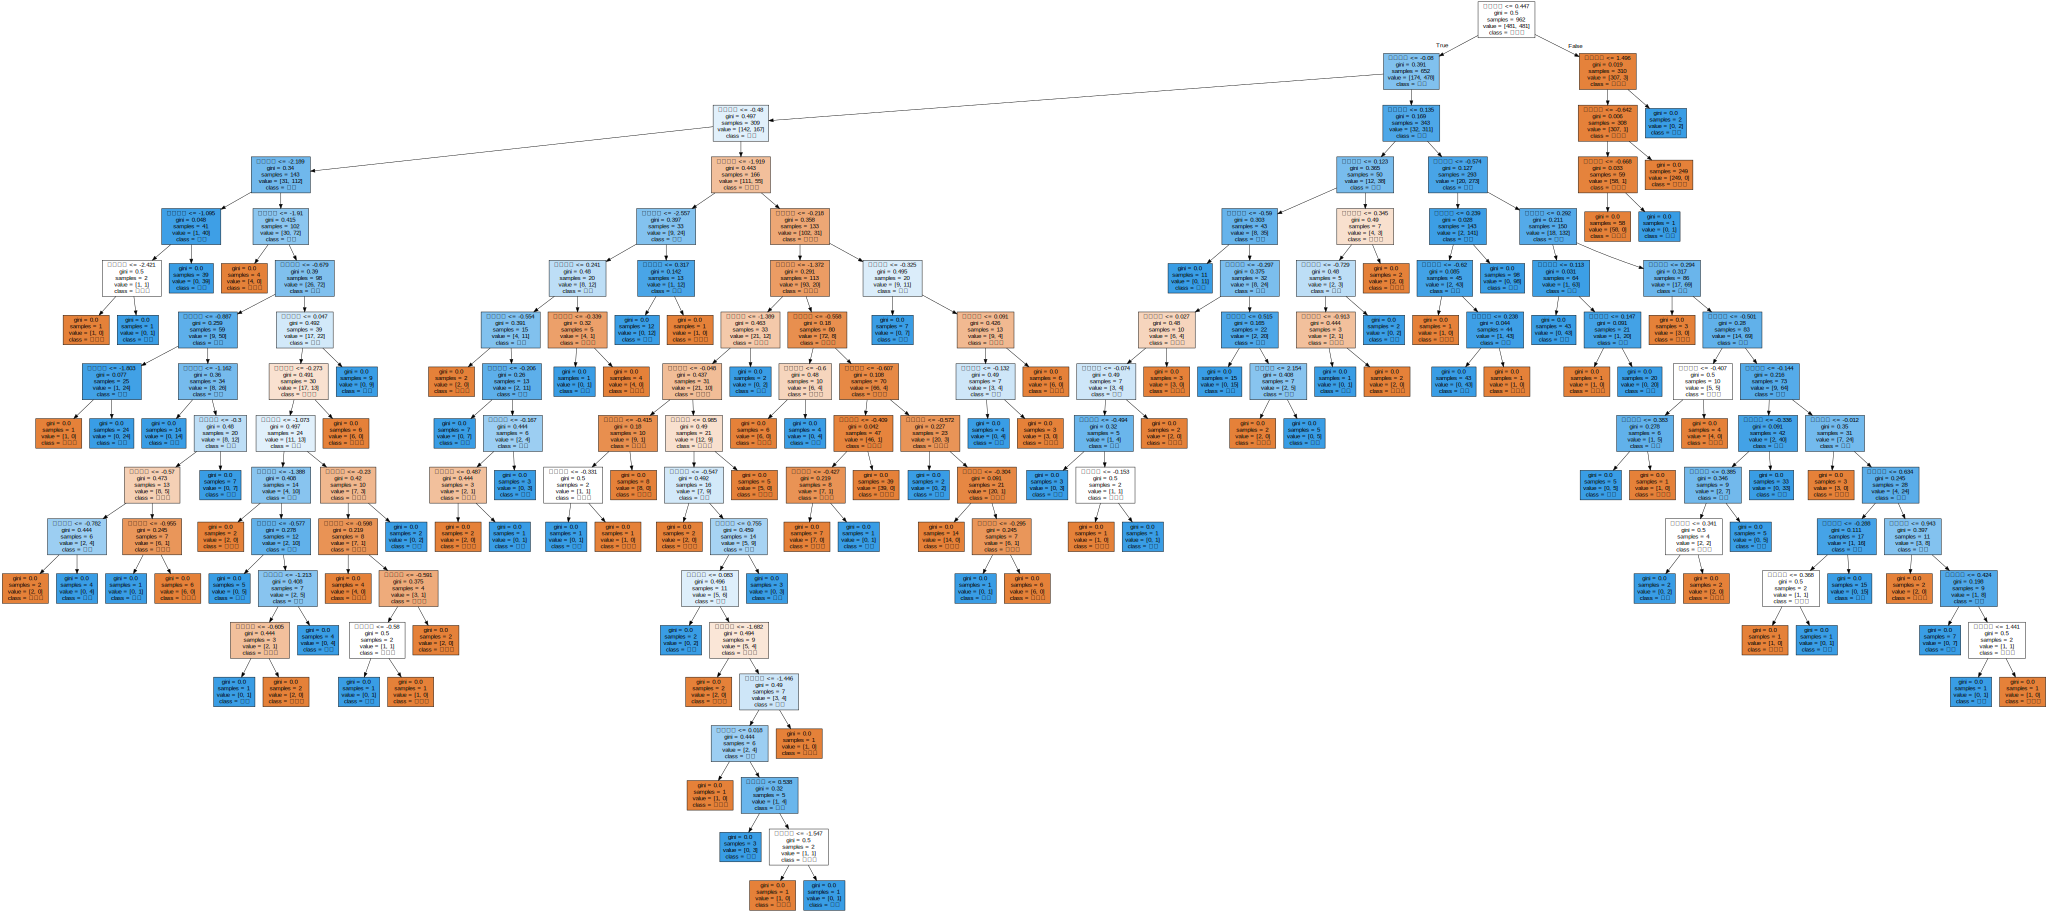

In [107]:
with open('tree.dot', encoding = 'utf-8') as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)